In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
points = circle_of(200)

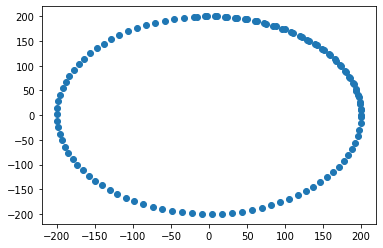

In [5]:
plt.scatter(points[:, 0], points[:, 1])

In [379]:
class AssumedSphere:
    def __init__(self, mass, v_i, f_i, pos_i, t_i):
        self.mass = mass
        self.v_i = v_i
        self.f_i = f_i
        self.pos_i = np.array(pos_i)
        self.t_i = t_i

        self.points = self.draw()
    
    @staticmethod
    def draw():
        return circle_of(10)

    @property
    def acc(self):
        return self.f_i / self.mass
    
    def vel(self, time):
        return self.v_i + self.acc * self.relative_time(time)
    
    def delta_pos(self, time):
        return self.v_i * self.relative_time(time) + .5 * self.acc * np.square(self.relative_time(time)), 0
        
    def current_pos(self, time):
        return self.pos_i + self.delta_pos(time)
    
    def vis(self, time):
        data =  self.points + self.current_pos(time)
        
        return data[:, 0], data[:, 1]
    
    def current_momentum(self, time=0):
        return self.mass * self.vel(time)
    
    def relative_time(self, time):
        return time - self.t_i
    
    def current_KE(self, time=0):
        return self.mass * np.square(self.vel(time))/2
        
    def __str__(self):
        return f'position: {self.pos_i}, velocity: {self.v_i}, mass: {self.mass}'
    
    def __repr__(self):
        return f'AssumedSphere ({str(self)})'

Dont set initial positions properly: dont worry, consider adding time initial

In [380]:
def perfectly_inelastic_collision(sphere_1, sphere_2, t):
    mass = sphere_1.mass + sphere_2.mass
    vel_f = (sphere_1.vel(t) * sphere_1.mass + sphere_2.vel(t) * sphere_2.mass) / mass
    force_f = sphere_1.f_i + sphere_2.f_i
    pos_f = sphere_1.current_pos(t)
    return AssumedSphere(mass, vel_f, force_f, pos_f, t)

In [381]:
s_1 = AssumedSphere(3, 4.3, 0, (2000, 0), 0)
s_2 = AssumedSphere(2, -2, 0, (9000, 0), 0)

In [382]:
out = perfectly_inelastic_collision(s_1, s_2, 0)

In [383]:
out

AssumedSphere (position: [2000.    0.], velocity: 1.7799999999999998, mass: 5)

In [384]:
out.current_momentum()

8.899999999999999

In [385]:
out

AssumedSphere (position: [2000.    0.], velocity: 1.7799999999999998, mass: 5)

In [386]:
out.current_momentum()

8.899999999999999

In [387]:
(s_1.current_KE() + s_2.current_KE())

31.735

In [388]:
out.current_KE()

7.920999999999998

In [389]:
def quadratic_formula(a, b, c):
    return [f(-b, np.sqrt(np.square(b) - 4*a*c))/(2*a) for f in [lambda x, y: x + y, lambda x, y: x - y]]

In [390]:
s_1 = AssumedSphere(200, 1, 0, (2000, 0), 0)
s_2 = AssumedSphere(1, 0, 0, (9000, 0), 0)

In [391]:
def elastic_collision(sphere_1, sphere_2, t=0):
    k = sphere_1.mass * np.square(sphere_1.vel(t)) + sphere_2.mass * np.square(sphere_2.vel(t))
    c = sphere_1.mass / sphere_2.mass * sphere_1.vel(t) + sphere_2.vel(t)
    
    v_1fs = quadratic_formula(
            sphere_1.mass + np.square(sphere_1.mass)/sphere_2.mass, 
            -2 * sphere_1.mass * c, 
            sphere_2.mass * np.square(c) - k
        )
    
    for val in v_1fs:
        if not np.isclose(val, sphere_1.vel(t)):
            sphere_1.v_i = val
    
    
    sphere_2.v_i = np.sqrt((k - sphere_1.mass * np.square(sphere_1.vel(t))) / sphere_2.mass)
    
    

In [454]:
def collide(sphere_1, sphere_2, t):
    s_1_p = sphere_1.current_pos(t)
    s_2_p = sphere_2.current_pos(t)
    elastic_collision(sphere_1, sphere_2, t)
    sphere_1.pos_i = -t * np.array([sphere_1.vel(t), 0]) + s_1_p
    sphere_2.pos_i = -t * np.array([sphere_2.vel(t), 0]) + s_2_p


In [437]:
elastic_collision(s_1, s_2)

In [438]:
s_1

AssumedSphere (position: [2000    0], velocity: 0.9900497512437811, mass: 200)

In [439]:
s_2

AssumedSphere (position: [9000    0], velocity: 1.9900497512437787, mass: 1)

In [440]:
s_1.current_momentum() + s_2.current_momentum()

200.00000000000003

In [441]:
 s_1.current_KE() + s_2.current_KE()

100.0

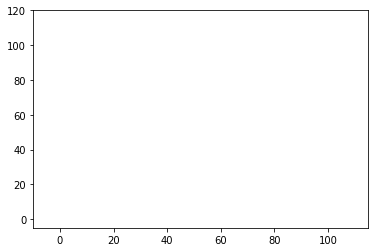

In [442]:
fig, ax = plt.subplots()

ax = plt.axes(xlim=(-10, 115), ylim=(-5, 120))

line, = ax.plot([], [], lw=2)

In [443]:
def circle_of(radius):
    points = []
    for i in range(2*4*15):
        points.append([radius * np.cos(i/15), radius * np.sin(i/15)])
    
    return np.array(points)

In [491]:
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially

sphere_1 = AssumedSphere(400, 4, 0, (20, 0), 0)
sphere_2 = AssumedSphere(200, -3, 0, (90, 0), 0)

def animate(t): 
    # t is a parameter
    
    # x, y values to be plotted 
    
    # appending new points to x, y axes points list 
    if sphere_2.current_pos(t)[0] - sphere_1.current_pos(t)[0] <= 20 and not triggered:
        collide(sphere_1, sphere_2, t)
    
    xs = []
    ys = []
    for x_set, y_set in [sphere_1.vis(t), sphere_2.vis(t)]:
        xs.extend(x_set)
        ys.extend(y_set)
    line.set_data(xs, ys)

    return line, 

In [492]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=70, interval=100, blit=True)

In [493]:
HTML(anim.to_html5_video())


2 objects that move